In [1]:
library(ggplot2)
library(reshape2)

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘reshape2’ was built under R version 3.6.2”


## Panel A- Bar plot showing the significance of GR-etranscripts for enrichment in MDD transcriptional profiles in six brain regions. Both male and female GR-etranscripts were tested against male and female MDD transcriptional profiles. The black line indicates significance cut-off at a p-value of 0.05. 


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$lab

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Ko

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$lab

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−female etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & female MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <88>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <92>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Konvertierungsfehler für 'GR−male etranscript & male MDD gene' in 'mbcsToSbcs': Punkt ersetzt <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Ko

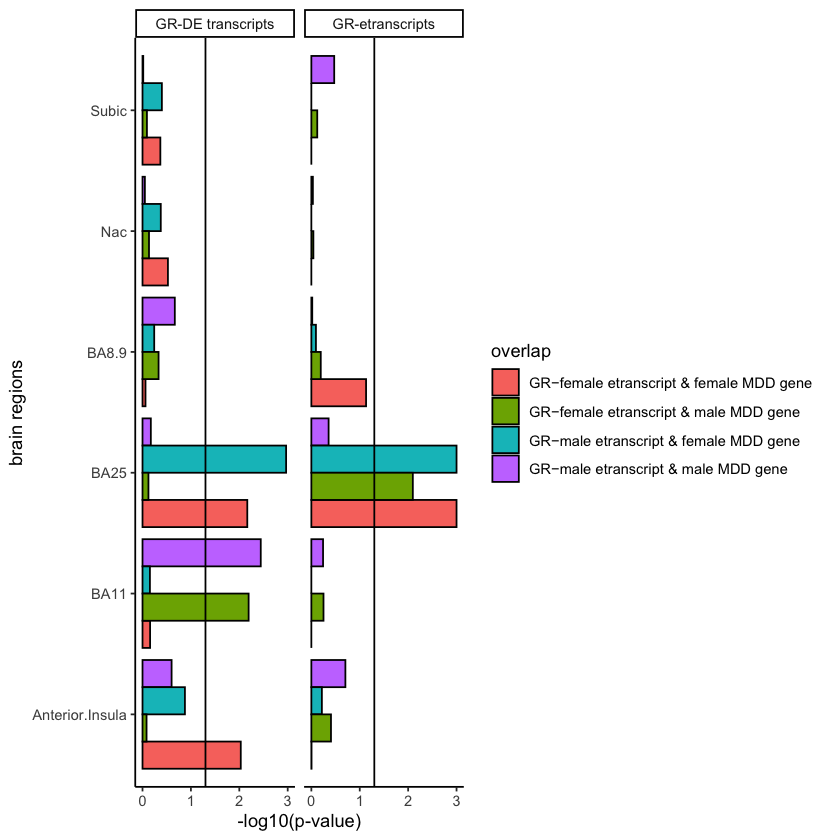

In [2]:
data.genes <-  readRDS("data/fig4A_transcripts_results.rds")
colnames(data.genes)[2]="Anterior.Insula"
data.genes.log <- cbind(data.genes$X,-log10(data.genes[,-1]))
colnames(data.genes.log)[1] <- "varname"
data.genes.log.t <-  t(data.genes.log[,-1] )
colnames(data.genes.log.t) <- data.genes.log$varname
data.genes.log.melt <- melt(t(data.genes.log.t))
data.genes.log.melt$data="GR-DE transcripts"

data.egenes <-  readRDS("data/fig4A_etranscripts_results.rds")
data.egenes.log <- cbind(data.egenes$X,-log10(data.egenes[,-1]))
colnames(data.egenes.log)[1] <- "varname"
data.egenes.log.t <-  t(data.egenes.log[,-1] )
colnames(data.egenes.log.t) <- data.egenes.log$varname
data.egenes.log.melt <- melt(t(data.egenes.log.t))
data.egenes.log.melt$data="GR-etranscripts"

both <- rbind(data.genes.log.melt,data.egenes.log.melt)
both$overlap=""
both[both$Var1=="mGRtranscripts_m"|both$Var1=="mGRetranscripts_m",]$overlap="GR−male etranscript & male MDD gene"
both[both$Var1=="mGRtranscripts_f"|both$Var1=="mGRetranscripts_f",]$overlap="GR−male etranscript & female MDD gene"
both[both$Var1=="fGRtranscripts_f"|both$Var1=="fGRetranscripts_f",]$overlap="GR−female etranscript & female MDD gene"
both[both$Var1=="fGRtranscripts_m"|both$Var1=="fGRetranscripts_m",]$overlap="GR−female etranscript & male MDD gene"
ggplot(both, aes(x = Var2, y=value,fill=overlap)) +
  geom_bar(stat="identity", colour="black", position=position_dodge())+geom_hline(yintercept = -log10(0.05))+
  coord_flip()+theme_classic()+ylab("-log10(p-value)")+xlab("brain regions")+facet_wrap(~data)


## Panel B- Upset plot displaying the overlapping significant sex-stratified GR-response etranscripts with BA25 MDD-related transcripts. 

In [ ]:
todo

## Panel C-D - GO enrichment results for etranscripts overlapping with BA25 MDD-related transcripts

In [ ]:
todo

## Panel E - DUSP6 example showing gene expression at baseline and post dexamethasone 

In [ ]:
todo